**Author : Gaurav Somvanshi**

**Data Science And Business Analytics At GRIP MAY21**


**Task 1 : Prediction Using Supervised ML**

Predict the percentage of an student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?

**Importing the libraries and the required data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_table("http://bit.ly/w-data", sep = ",")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

<function matplotlib.pyplot.show>

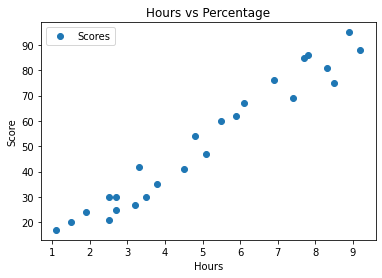

In [ ]:
# Plotting data to find the relationship between two attributes
import matplotlib.pyplot as plt
df.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show

**From the above graph we can infer that there is positive linear relation between Number of hours studied and the Percentage of score**

In [ ]:
from sklearn.model_selection import train_test_split

**Preparing The Data**

In [ ]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((20, 1), (5, 1), (20,), (5,))

**Training The Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Accuracy Of the Algorithm**

In [ ]:
linreg.score(X_test, Y_test)

0.9454906892105354

In [ ]:
y_pred_lin_reg = linreg.predict(X_test)

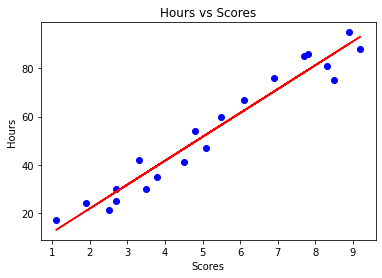

In [ ]:
# Regression Line
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, linreg.predict(X_train), color = "red")
plt.title("Hours vs Scores")
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.show()


**Making Predictions**

In [ ]:
df = pd.DataFrame({"Actual":Y_test, "Predicted":y_pred_lin_reg})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Graph Of Actual vs Predicted Values**

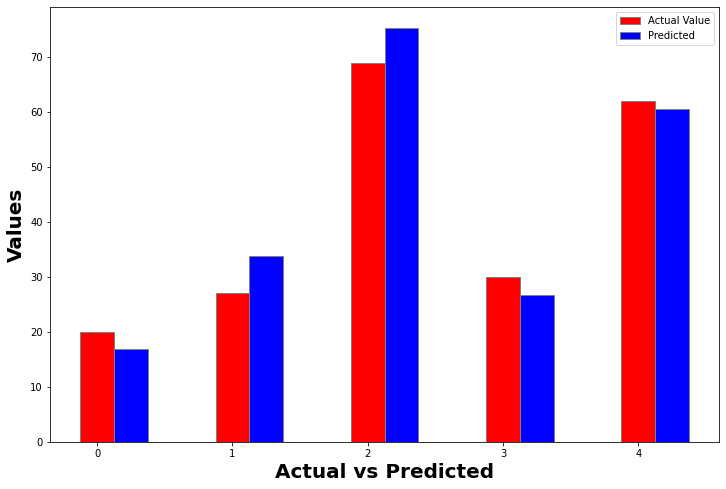

In [ ]:
barwidth = 0.25
fig = plt.subplots(figsize = (12, 8))
# Set position of bar on X axis
br1 = np.arange(len(Y_test))
br2 = [x + barwidth for x in br1]
# Make the plot
plt.bar(br1, Y_test, color = "red", width = barwidth, 
        edgecolor = "grey", label = "Actual Value")
plt.bar(br2, y_pred_lin_reg, color = "blue", width = barwidth, 
        edgecolor = "grey", label = "Predicted")
plt.xlabel("Actual vs Predicted", fontweight = "bold", fontsize = 20)
plt.ylabel("Values", fontweight = "bold", fontsize = 20)
plt.legend()
plt.show()

In [ ]:
X = X.reshape(1, -1)
Y = Y.reshape(1, -1)

In [ ]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
hours = 9.25
pred = linreg.predict([[hours]])
print("No. of hours {}".format(hours))
print("Predicted Score {}".format(pred[0]))

No. of hours 9.25
Predicted Score 93.69173248737539


**Evaluating The Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We have choosed mean squared error and R - Squared Value

In [ ]:
from sklearn import metrics
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, y_pred_lin_reg))

Mean Squared Error:  21.598769307217456


In [ ]:
from scipy import stats
slope, inter, r, p, std = stats.linregress(Y_test, y_pred_lin_reg)
print("R-Squared value is {}".format(r))

R-Squared value is 0.9806835759589492
